In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from local_plot import *
from utils import *
def read_multi_folder(folder, nodes, enable_pgo=True):
    paths = {}
    paths_pgo = {}
    t0 = None
    for i in nodes:
        output_folder = folder + str(i) + "/"
        _paths, t0 = read_paths(output_folder, [i], t0=t0)
        if enable_pgo:
            _paths_pgo, t0 = read_paths(output_folder, [i], prefix="pgo_", t0=t0)
            paths_pgo[i] = _paths_pgo[i]
        paths[i] = _paths[i]
    if len(paths_pgo) == 0:
        return paths, None, t0
    return paths, paths_pgo, t0


In [ ]:
nodes = [1, 2, 5, 6, 7]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2vins-5-sync/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=False)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_noyaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths, paths_gt, dte=dte, show=False))

paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono_noyaw_", t0=t0)
print("VINS-Mono")
align_paths(paths_vo, paths_gt)
display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
display(plot_relative_pose_err(nodes[0], nodes[1:], paths_vo, paths_gt, dte=dte, show=False))

plot_fused(nodes, paths, poses_gt=paths_gt, figsize=(10,10))


In [ ]:
nodes = [1, 2, 3, 4, 5]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2vins-5-yaw-async/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=False)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_yaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths, paths_gt, dte=dte, show=False))

paths_vo, t0 = read_paths(data_folder, nodes, prefix="vins-mono_yaw_", t0=t0)
print("VINS-Mono")
align_paths(paths_vo, paths_gt)
display(plot_fused_err(nodes, paths_vo, paths_gt, dte=dte, show=False))
display(plot_relative_pose_err(nodes[0], nodes[1:], paths_vo, paths_gt, dte=dte, show=False))

plot_fused(nodes, paths, poses_gt=paths_gt, figsize=(10,10))




In [ ]:
nodes = [1, 2, 3, 4, 5]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2vins-5-yaw-sync/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=False)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_yaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths, paths_gt, dte=dte, show=False))


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m,PGO:ATE Pos,ATE Att
1by1,237.5m,1.470,3.601,4.0e-03,6.6e-03,2.5e-04,1.23e-02,0.196,3.990°
2by1,238.9m,1.365,3.646,4.2e-03,6.3e-03,4.9e-04,2.08e-03,0.137,3.053°
Avg.,238.2,1.418,3.62,,,,,0.167,3.52


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
1->2,"0.026,0.020,0.026",0.042,1.39°,"-0.017,+0.007,-0.019",+0.59°
Avg:,,0.042,1.39°,,


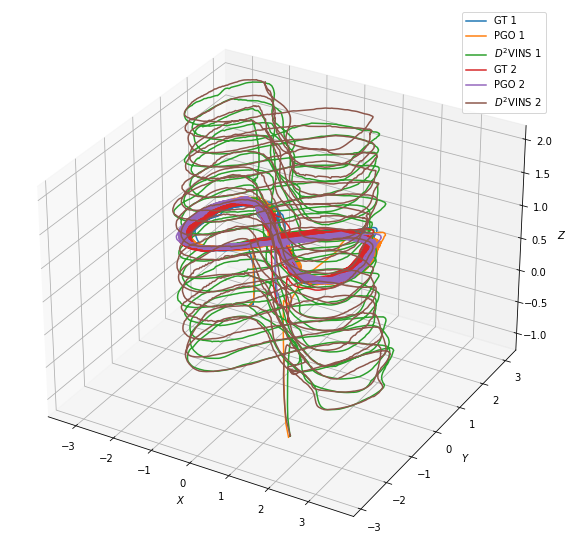

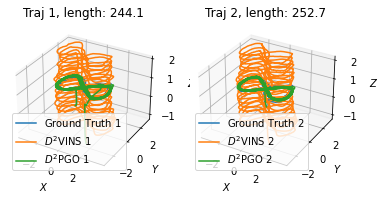

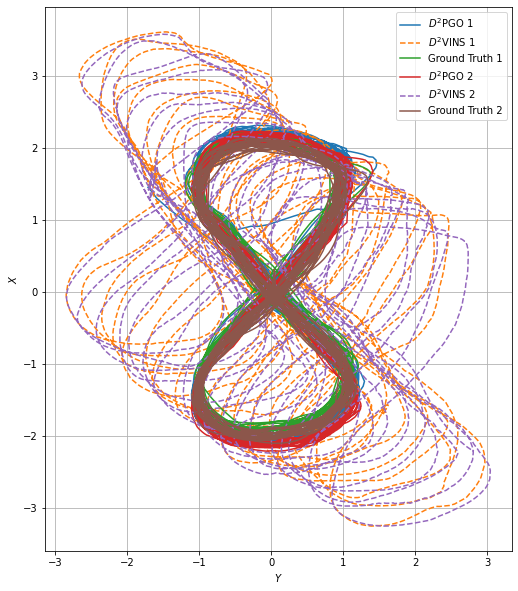

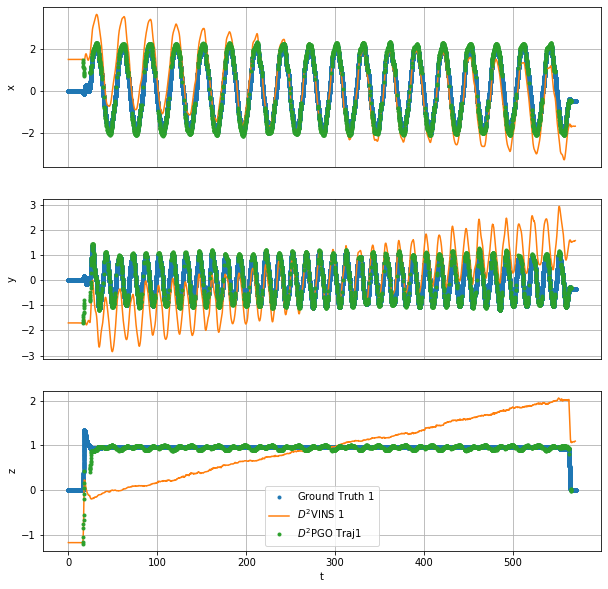

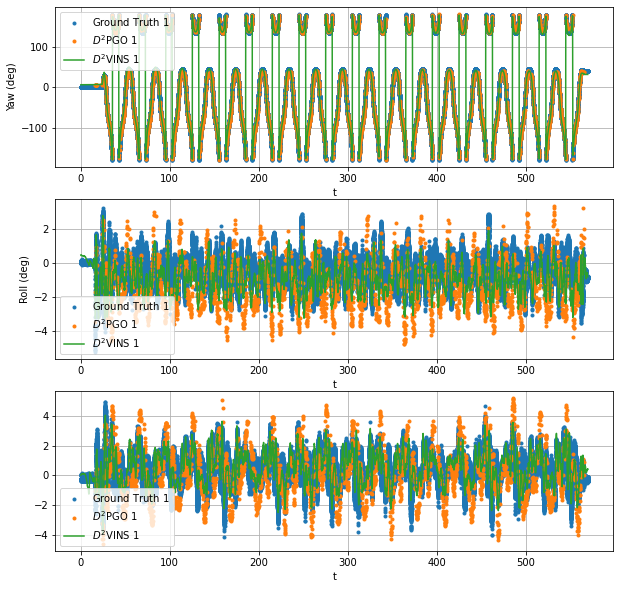

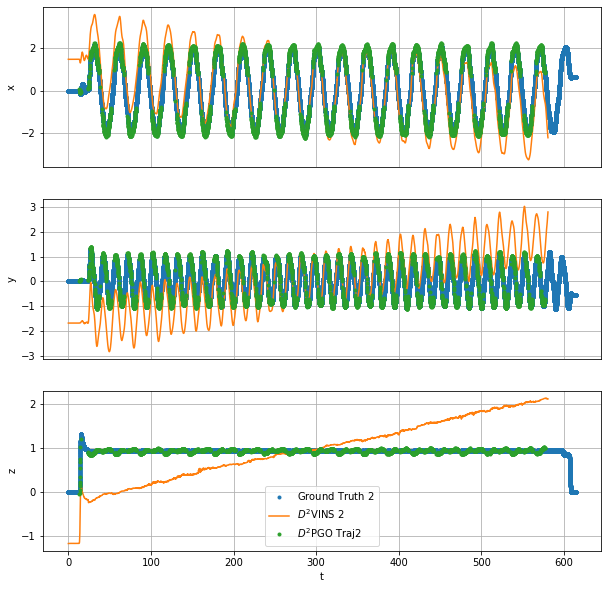

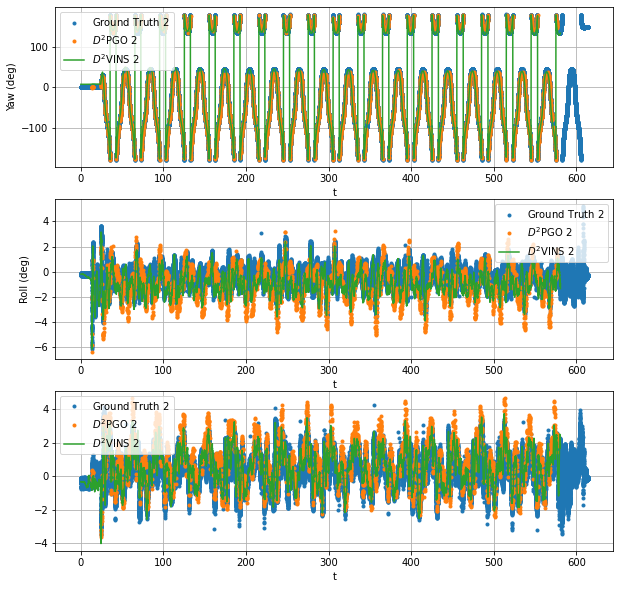

In [7]:
nodes = [1, 2]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2slam-2-yaw/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=True)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_yaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True, align_with_minize=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths, paths_gt, dte=dte, show=False))
plot_fused(nodes, paths, poses_pgo=paths_pgo, poses_gt=paths_gt, figsize=(10,10))


Drone,Traj. Len.,ATE Pos,ATE Att,Cov/m: x,y,z,Cov Att/m,PGO:ATE Pos,ATE Att
1by1,238.3m,1.403,8.986,4.4e-03,7.6e-03,1.6e-04,1.12e-02,0.166,4.105°
2by1,237.7m,1.322,8.296,3.0e-03,5.8e-03,2.0e-04,3.79e-03,0.289,2.891°
3by1,237.7m,1.455,9.520,3.4e-03,7.1e-03,2.2e-04,3.78e-03,0.207,2.608°
4by1,238.1m,1.344,8.960,3.5e-03,6.4e-03,1.9e-04,3.18e-03,0.377,5.306°
5by1,240.4m,1.336,8.519,3.0e-03,6.0e-03,2.0e-04,3.43e-03,0.297,2.768°
Avg.,238.4,1.372,8.86,,,,,0.267,3.54


Relative,EST RMSE: Pos (XYZ),POS,Ang,BIAS: Pos,Ang
1->2,"0.020,0.013,0.008",0.025,0.87°,"-0.013,+0.000,+0.002",-0.04°
1->3,"0.023,0.015,0.009",0.029,0.81°,"-0.008,+0.003,+0.003",+0.19°
1->4,"0.025,0.018,0.009",0.032,0.91°,"-0.007,+0.002,+0.003",+0.07°
1->5,"0.024,0.016,0.008",0.029,0.86°,"-0.008,-0.000,+0.003",-0.03°
Avg:,,0.029,0.87°,,


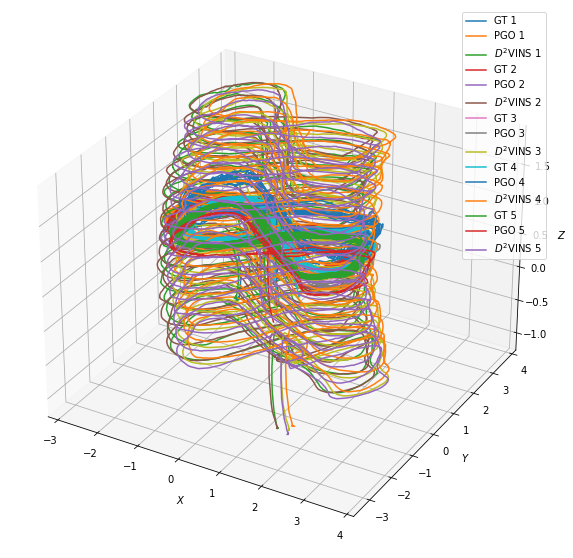

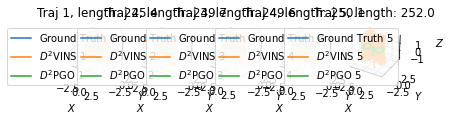

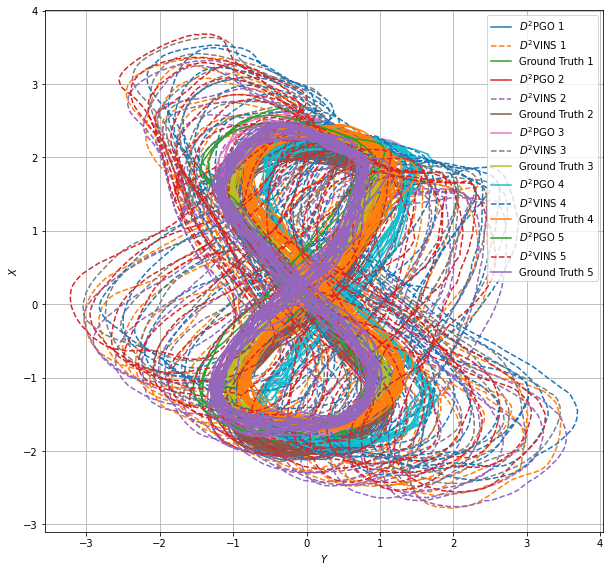

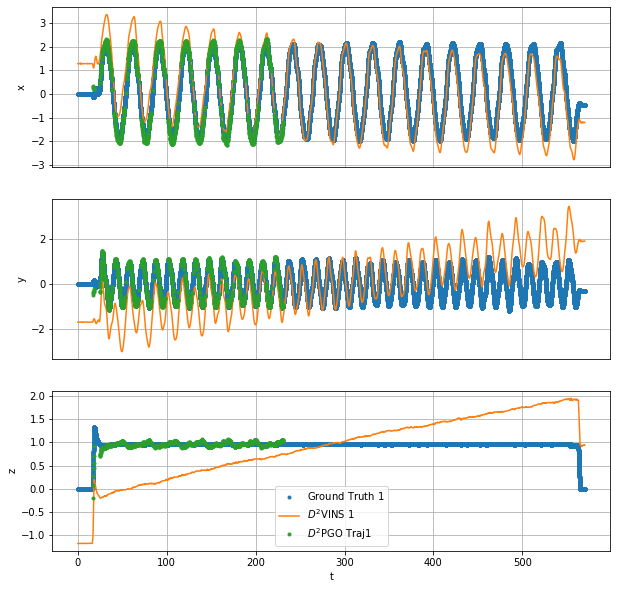

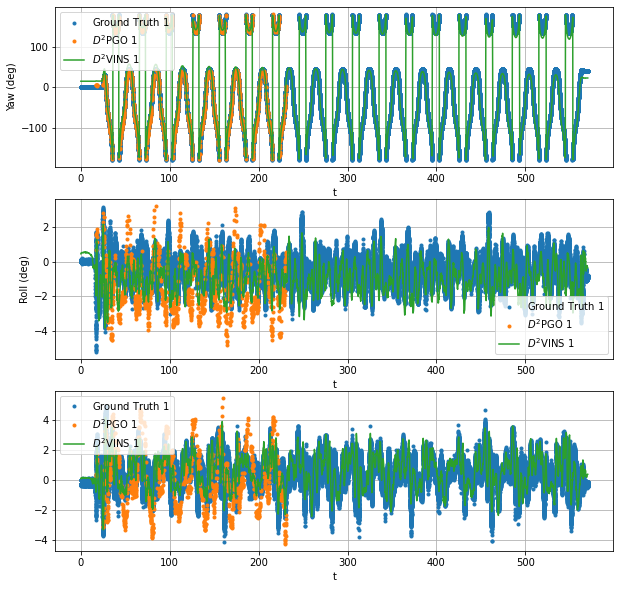

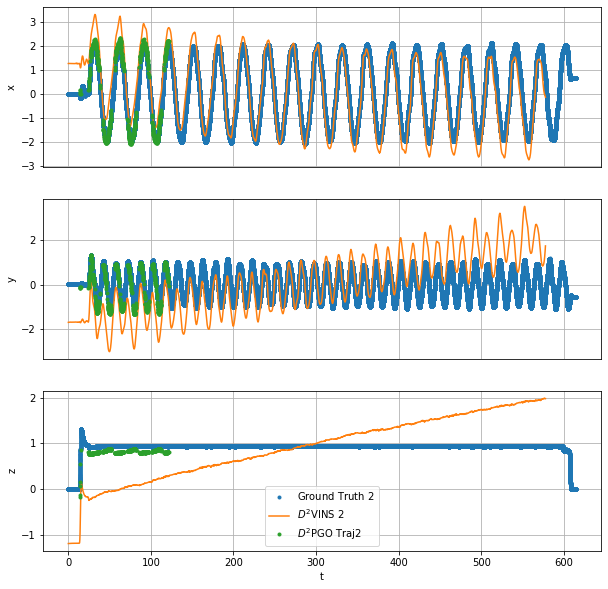

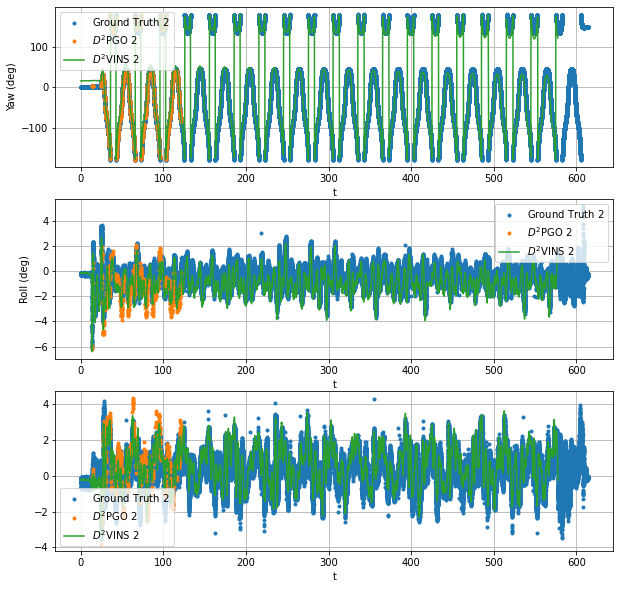

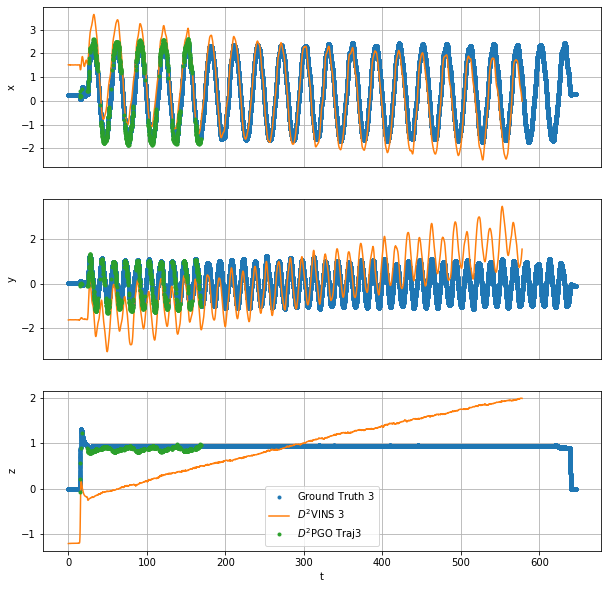

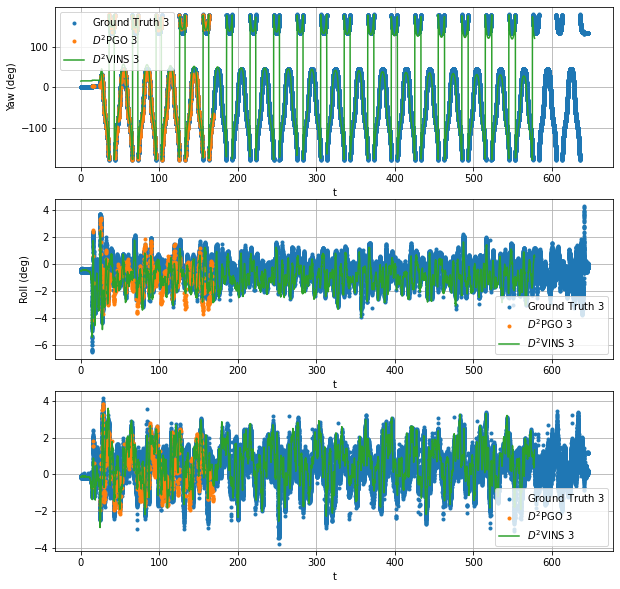

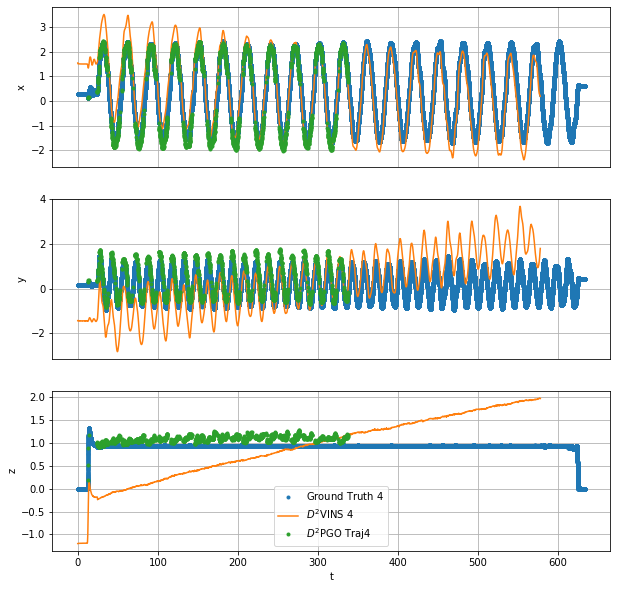

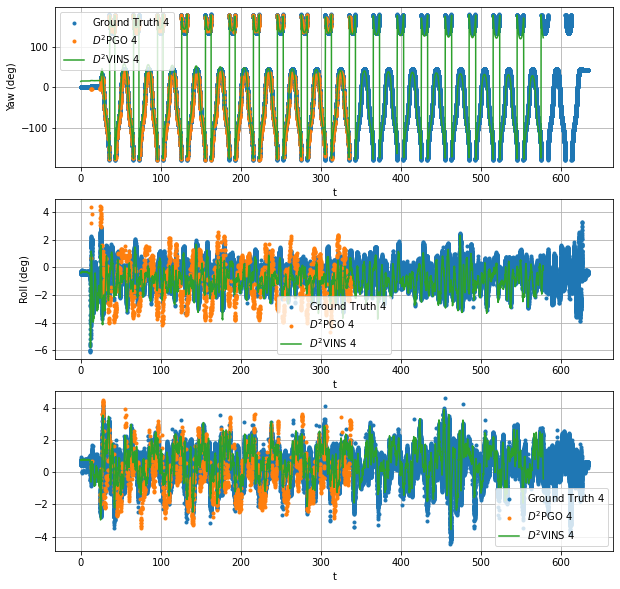

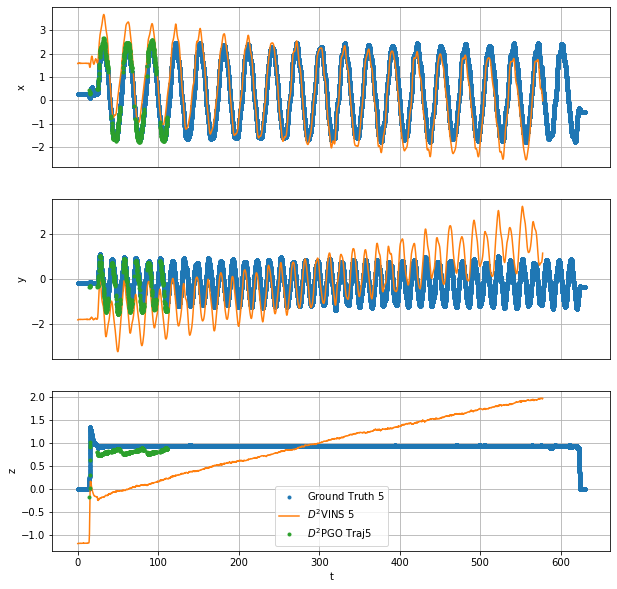

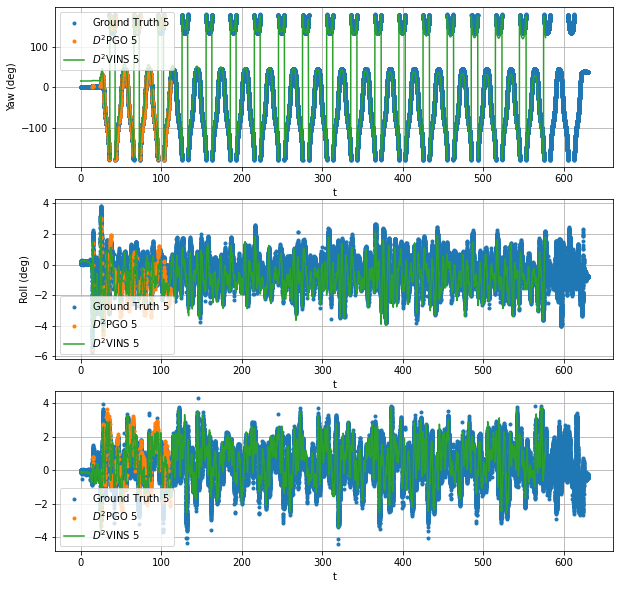

In [3]:
nodes = [1, 2, 3, 4, 5]
output_folder = "/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/outputs/d2slam-5-yaw/swarm"
data_folder="/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14"
dte = 550
paths, paths_pgo, t0 = read_multi_folder(output_folder, nodes, enable_pgo=True)
paths_gt, _ = read_paths(data_folder, nodes, prefix="eight_yaw_", suffix="-groundtruth.txt", t0=t0)
align_paths(paths, paths_gt, align_by_first=True, align_with_minize=True)
if paths_pgo is not None:
    align_paths(paths_pgo, paths_gt, align_by_first=True, align_with_minize=True)
display(plot_fused_err(nodes, paths, paths_gt, poses_pgo=paths_pgo, dte=dte, show=False))
display(plot_relative_pose_err(1, nodes[1:], paths, paths_gt, dte=dte, show=False))
plot_fused(nodes, paths, poses_pgo=paths_pgo, poses_gt=paths_gt, figsize=(10,10))


In [ ]:
#Find the nearest pair of datasets
paths_gt = {}
t0 = None
nodes = [1, 2, 4, 5, 6, 7]
for i in nodes:
    paths_gt[i], t0 = read_path_from_csv(f"/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/eight_noyaw_{i}-groundtruth.txt", t0)
output_table = [i for i in range(0, 7)]
output_table[0] = "Drone"

dis_sum = 0.0
count = 0

for i in nodes:
    for j in nodes:
        if j > i:
            t = find_common_times(paths_gt[i].t, paths_gt[j].t)
            ate_pos = ATE_POS(paths_gt[i].pos_func(t), paths_gt[j].pos_func(t))
            dis_sum += ate_pos
            count += 1
            print(f"i={i}, j={j} ate_pos={ate_pos}")
print(f"Average ate_pos={dis_sum/count}")


In [ ]:
#Find the nearest pair of datasets
paths_gt = {}
t0 = None
nodes = [1, 2, 3, 4, 5]
for i in nodes:
    paths_gt[i], t0 = read_path_from_csv(f"/home/xuhao/data/d2slam/quadcam_7inch_n3_2023_1_14/eight_yaw_{i}-groundtruth.txt", t0)
output_table = [i for i in range(0, 7)]
output_table[0] = "Drone"

dis_sum = 0.0
count = 0

for i in nodes:
    for j in nodes:
        if j > i:
            t = find_common_times(paths_gt[i].t, paths_gt[j].t)
            ate_pos = ATE_POS(paths_gt[i].pos_func(t), paths_gt[j].pos_func(t))
            dis_sum += ate_pos
            count += 1
            print(f"i={i}, j={j} ate_pos={ate_pos}")
print(f"Average ate_pos={dis_sum/count}")
